In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftrain = pd.read_csv('train.csv')

In [3]:
dftest = pd.read_csv('test.csv')

In [4]:
print(dftrain.shape)
print('-'*50)
print(dftest.shape)

(614, 13)
--------------------------------------------------
(367, 12)


In [5]:
dftrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
dftest['Loan_Status'] = 'test'

In [8]:
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [9]:
combinedf = pd.concat([dftrain,dftest],axis=0)

In [10]:
combinedf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
combinedf.shape

(981, 13)

In [12]:
numcols = combinedf.select_dtypes(include = np.number)
objcols = combinedf.select_dtypes(include = ['object'])

In [13]:
objcols.isnull().sum().sort_values(ascending=False)

Self_Employed    55
Dependents       25
Gender           24
Married           3
Loan_ID           0
Education         0
Property_Area     0
Loan_Status       0
dtype: int64

In [14]:
objcols.Self_Employed.value_counts(dropna=False)

No     807
Yes    119
NaN     55
Name: Self_Employed, dtype: int64

In [15]:
objcols.Dependents.value_counts(dropna=False)

0      545
1      160
2      160
3+      91
NaN     25
Name: Dependents, dtype: int64

In [16]:
objcols.Gender.value_counts(dropna=False)

Male      775
Female    182
NaN        24
Name: Gender, dtype: int64

In [17]:
for col in objcols.columns:
    objcols[col] = objcols[col].fillna(objcols[col].value_counts().idxmax())

In [18]:
objcols.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [19]:
numcols.isnull().sum().sort_values(ascending=False)

Credit_History       79
LoanAmount           27
Loan_Amount_Term     20
ApplicantIncome       0
CoapplicantIncome     0
dtype: int64

In [20]:
numcols.Credit_History.value_counts(dropna=False)

1.0    754
0.0    148
NaN     79
Name: Credit_History, dtype: int64

In [21]:
numcols.Credit_History.mean()

0.835920177383592

In [22]:
catcols = numcols.Credit_History

In [23]:
numcols = numcols.drop('Credit_History',axis = 1)

In [24]:
numcols.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [25]:
catcols = catcols.fillna(catcols.value_counts().idxmax())

In [26]:
catcols.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [27]:
catcols = catcols.replace([0,1],['No','Yes'])

In [28]:
catcols.value_counts()

Yes    833
No     148
Name: Credit_History, dtype: int64

In [29]:
numcols.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
dtype: int64

In [30]:
numcols.LoanAmount.value_counts(dropna=False)

120.0    29
NaN      27
110.0    27
100.0    24
187.0    21
         ..
218.0     1
62.0      1
53.0      1
242.0     1
197.0     1
Name: LoanAmount, Length: 233, dtype: int64

In [31]:
numcols.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,954.000000,961.000000
mean,5179.795107,1601.916330,142.511530,342.201873
std,5695.104533,2718.772806,77.421743,65.100602
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,100.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,162.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


<Axes: xlabel='LoanAmount', ylabel='Density'>

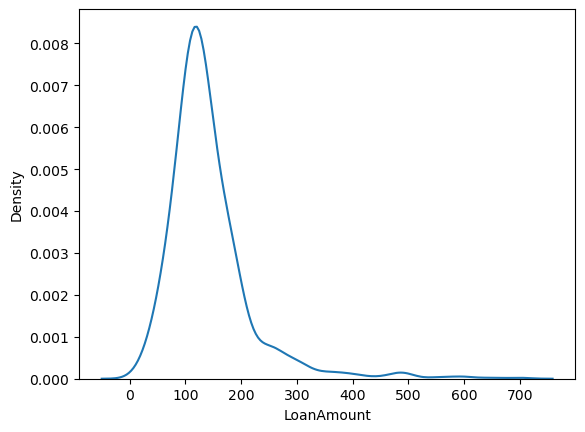

In [32]:
sns.kdeplot(numcols.LoanAmount)

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

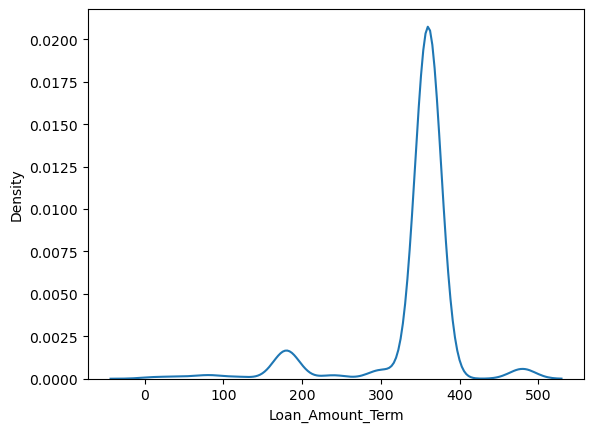

In [33]:
sns.kdeplot(numcols.Loan_Amount_Term)

In [34]:
numcols['LoanAmount'] = numcols.LoanAmount.fillna(numcols['LoanAmount'].median())

In [35]:
numcols['Loan_Amount_Term'] = numcols.LoanAmount.fillna(numcols['Loan_Amount_Term'].median())

In [36]:
numcols.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [37]:
catcols.isnull().sum()

0

In [38]:
objcols.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

<Axes: >

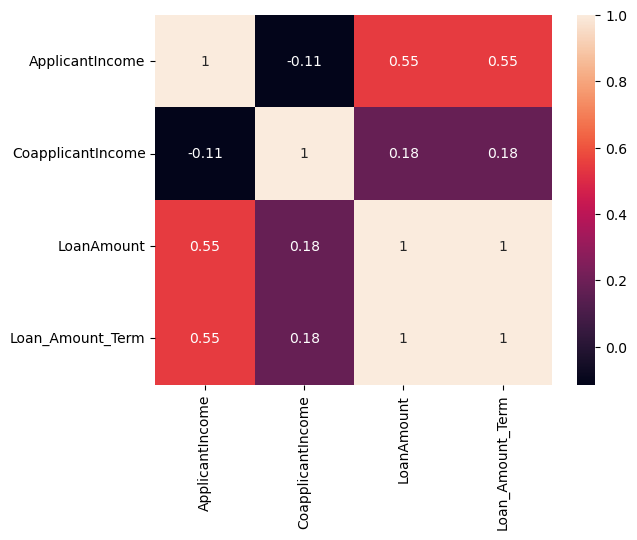

In [39]:
sns.heatmap(numcols.corr(),annot=True)

In [40]:
objcols = objcols.drop('Loan_ID',axis = 1)

In [41]:
objcols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban,test
363,Male,Yes,0,Graduate,No,Urban,test
364,Male,No,0,Graduate,No,Semiurban,test
365,Male,Yes,0,Graduate,No,Rural,test


In [42]:
y = objcols.Loan_Status

In [43]:
objcols = objcols.drop('Loan_Status',axis = 1)

In [44]:
objcols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [45]:
objcols['Credit_History'] = catcols

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
objcols_encoded = objcols.apply(le.fit_transform)

In [49]:
objcols_encoded

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,1
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
362,1,1,3,1,1,2,1
363,1,1,0,0,0,2,1
364,1,0,0,0,0,1,1
365,1,1,0,0,0,0,1


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sd = StandardScaler()

In [52]:
numcols_stdscale = sd.fit_transform(numcols)

In [53]:
numcols_stdscale = pd.DataFrame(numcols_stdscale, columns=numcols.columns)

In [54]:
numcols_stdscale

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.117565,-0.589506,-0.210291,-0.210291
1,-0.104844,-0.034561,-0.184098,-0.184098
2,-0.382944,-0.589506,-0.996077,-0.996077
3,-0.456202,0.278239,-0.288869,-0.288869
4,0.144093,-0.589506,-0.013844,-0.013844
...,...,...,...,...
976,-0.205684,0.064431,-0.380544,-0.380544
977,-0.179508,-0.328594,-0.354351,-0.354351
978,-0.339024,0.143919,-0.210291,-0.210291
979,-0.031586,0.291119,0.208795,0.208795


In [55]:
objcols_encoded

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,1
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
362,1,1,3,1,1,2,1
363,1,1,0,0,0,2,1
364,1,0,0,0,0,1,1
365,1,1,0,0,0,0,1


In [56]:
y = y.replace(['Y','N'],[1,0])

In [57]:
y

0         1
1         0
2         1
3         1
4         1
       ... 
362    test
363    test
364    test
365    test
366    test
Name: Loan_Status, Length: 981, dtype: object

In [58]:
objcols_encoded['Loan_Status'] = y

In [60]:
objcols_encoded

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status
0,1,0,0,0,0,2,1,1
1,1,1,1,0,0,0,1,0
2,1,1,0,0,1,2,1,1
3,1,1,0,1,0,2,1,1
4,1,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,2,1,test
363,1,1,0,0,0,2,1,test
364,1,0,0,0,0,1,1,test
365,1,1,0,0,0,0,1,test


In [61]:
objcols_encoded = objcols_encoded.reset_index()

In [62]:
numcols_stdscale = numcols_stdscale.reset_index()

In [63]:
combine_clean = pd.concat([objcols_encoded,numcols_stdscale],axis = 1)

In [64]:
combine_clean =  combine_clean.drop('index',axis = 1)

In [65]:
combine_clean

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,2,1,1,0.117565,-0.589506,-0.210291,-0.210291
1,1,1,1,0,0,0,1,0,-0.104844,-0.034561,-0.184098,-0.184098
2,1,1,0,0,1,2,1,1,-0.382944,-0.589506,-0.996077,-0.996077
3,1,1,0,1,0,2,1,1,-0.456202,0.278239,-0.288869,-0.288869
4,1,0,0,0,0,2,1,1,0.144093,-0.589506,-0.013844,-0.013844
...,...,...,...,...,...,...,...,...,...,...,...,...
976,1,1,3,1,1,2,1,test,-0.205684,0.064431,-0.380544,-0.380544
977,1,1,0,0,0,2,1,test,-0.179508,-0.328594,-0.354351,-0.354351
978,1,0,0,0,0,1,1,test,-0.339024,0.143919,-0.210291,-0.210291
979,1,1,0,0,0,0,1,test,-0.031586,0.291119,0.208795,0.208795


In [66]:
dftrain_clean = combine_clean[combine_clean.Loan_Status != 'test']
dftest_clean  = combine_clean[combine_clean.Loan_Status == 'test']

In [67]:
y = dftrain_clean.Loan_Status
X = dftrain_clean.drop('Loan_Status',axis = 1)

In [68]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,2,1,0.117565,-0.589506,-0.210291,-0.210291
1,1,1,1,0,0,0,1,-0.104844,-0.034561,-0.184098,-0.184098
2,1,1,0,0,1,2,1,-0.382944,-0.589506,-0.996077,-0.996077
3,1,1,0,1,0,2,1,-0.456202,0.278239,-0.288869,-0.288869
4,1,0,0,0,0,2,1,0.144093,-0.589506,-0.013844,-0.013844
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,-0.400512,-0.589506,-0.930595,-0.930595
610,1,1,3,0,0,0,1,-0.188643,-0.589506,-1.336584,-1.336584
611,1,1,1,0,0,2,1,0.508100,-0.501186,1.452957,1.452957
612,1,1,2,0,0,2,1,0.422193,-0.589506,0.588592,0.588592


In [69]:
dftest_clean = dftest_clean.drop('Loan_Status', axis = 1)

In [70]:
X.shape,dftest_clean.shape

((614, 11), (367, 11))

In [71]:
y =  y.astype('int')

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
lr = LogisticRegression()

In [75]:
lrmodel = lr.fit(X,y)

In [76]:
y.dtype

dtype('int32')

In [77]:
lrmodel.score(X,y)

0.8127035830618893

In [78]:
np.mean(cross_val_score(lr,X,y))

0.8045715047314408

In [79]:
lrpredict = lrmodel.predict(X)

In [80]:
from sklearn.metrics import classification_report,RocCurveDisplay

In [81]:
print(classification_report(y,lrpredict))

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



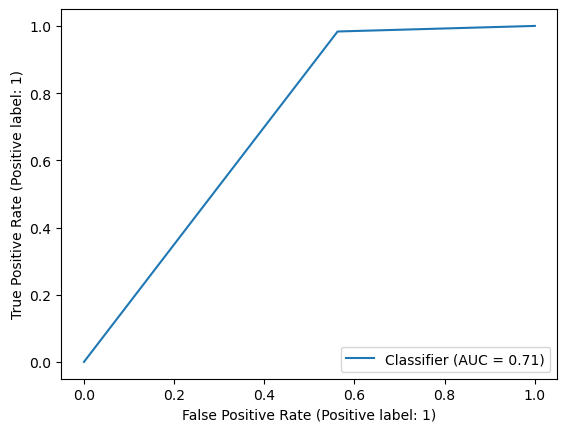

In [82]:
RocCurveDisplay.from_predictions(y,lrpredict)

In [83]:
from sklearn.svm import SVC

In [84]:
sv = SVC()

In [85]:
svmodel = sv.fit(X,y)

In [86]:
svmodel.score(X,y)

0.8175895765472313

In [88]:
import pickle

In [89]:
pickle.dump(lr,open('regmodel.pkl','wb'))

In [90]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))